In [114]:
# (auto-reload changes from imported libraries)
%load_ext autoreload
%autovaload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


UsageError: Line magic function `%autovaload` not found.


In [ ]:
import pm4py
import pandas as pd

log = pm4py.read_xes("../logs/sepsis/sepsis.xes")
# log = pd.read_csv("../logs/sepsis/sepsis_subset.csv")

In [ ]:
from convert_log import convert_xes_rdf, RdfRepresent
from rdflib import Namespace

Sepsis = Namespace("http://dutch.hospital.nl/sepsis#")

# convert_xes_rdf(log, "../logs/sepsis/sepsis_pred_25.n3", RdfRepresent.LINK_PRED, 250)
# convert_xes_rdf(log, "../logs/sepsis/sepsis_50.n3", RdfRepresent.LINK_PRED, 500)
# convert_xes_rdf(log, "../logs/sepsis/sepsis_pred_all.n3", RdfRepresent.LINK_PRED)
convert_xes_rdf(log, "../logs/sepsis/sepsis_subset.n3", Sepsis, RdfRepresent.LINK_PRED)

In [6]:
import pm4py
import pandas as pd

log = pm4py.read_ocel2("../logs/ocel2/ocel2-p2p.xml")

In [7]:
from convert_log import convert_ocel2_rdf, RdfRepresent
from rdflib import Namespace

P2P = Namespace("http://ocel2.org/p2p#")

convert_ocel2_rdf(log, "../logs/ocel2/ocel2-p2p-5000.ttl", P2P, 5000)

conversion time (ms): 1686.319
save time (ms): 1676.775
total time (ms): 3363.237


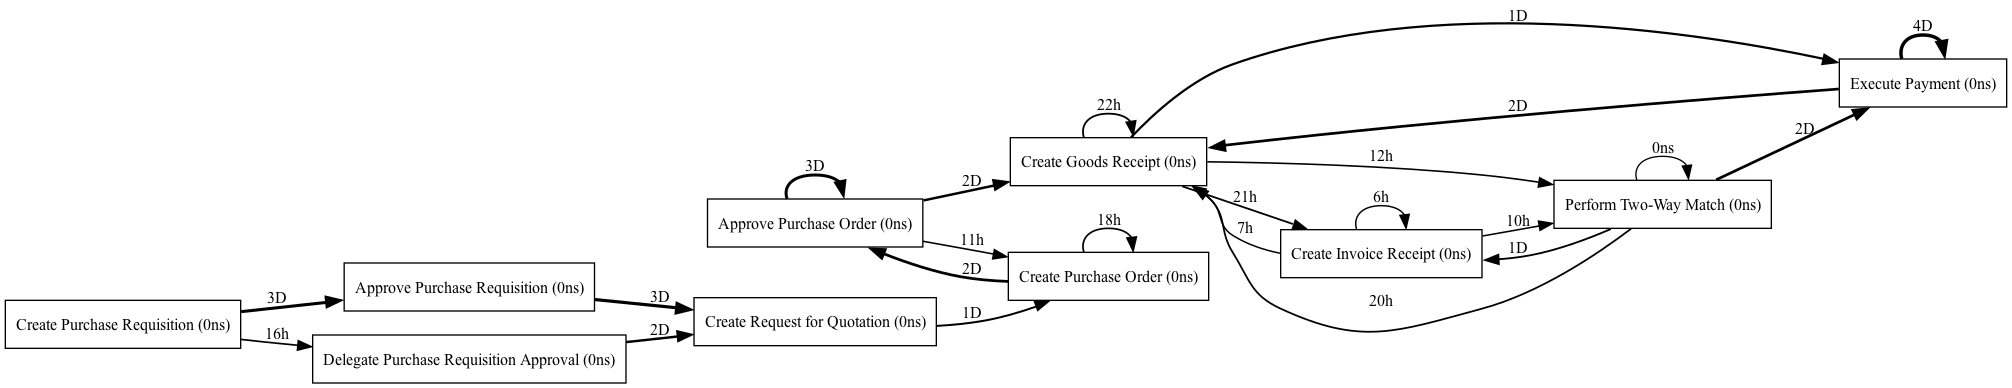

In [23]:
import rdflib
from convert_log import convert_rdf_xes

g = rdflib.Graph()
g.parse("logs/ocel2/ocel2-p2p-1000-traces.ttl")
g.parse("logs/ocel2/ocel2-p2p-1000.ttl")

log = convert_rdf_xes(g)

from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer

dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz = dfg_visualizer.apply(dfg, log=log, variant=dfg_visualizer.Variants.PERFORMANCE)
dfg_visualizer.view(gviz)

## Explore the process log

### Follow object relations & create graph

                                    ocel:oid    ocel:eid
20748  purchase_requisition:99:pr_trigger_99  event:2483
3439   purchase_requisition:99:pr_trigger_99  event:2575
23194                           quotation:98  event:2621
23195  purchase_requisition:99:pr_trigger_99  event:2621
17578                     purchase_order:160  event:2639
17579                           quotation:98  event:2639
17584                           quotation:98  event:2659
17585                     purchase_order:158  event:2659
17586                           quotation:98  event:2661
17587                     purchase_order:159  event:2661
306                             quotation:98  event:2681
307                       purchase_order:158  event:2681
308                       purchase_order:160  event:2682
309                             quotation:98  event:2682
316                             quotation:98  event:2750
317                       purchase_order:159  event:2750
5971                      purch

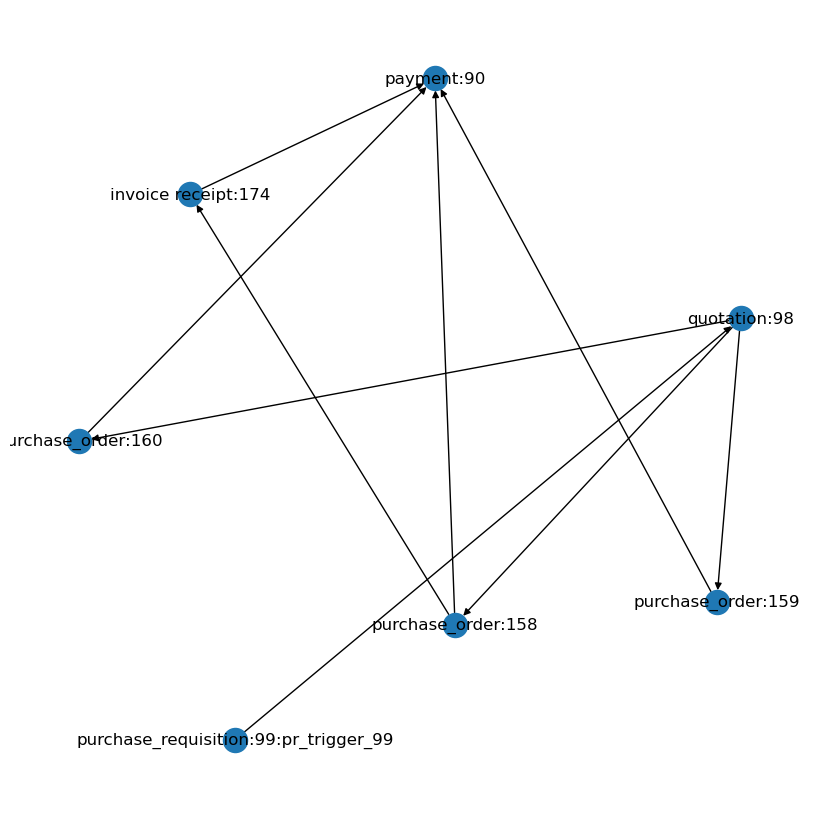

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt 

seed = 'purchase_requisition:99:pr_trigger_99'

G = nx.DiGraph(height = "750px",
                width = "100%") 

relations = {}; objects = []
queue = [ seed ]

while len(queue) > 0:
    next = queue.pop()
    objects.append(next)
    
    result = log.o2o.loc[(log.o2o['ocel:oid']==next),]
    
    for _, row in result.iterrows():
        n1 = row['ocel:oid']; n2 = row['ocel:oid_2']
        if n2.startswith('material'): continue
        rel = (n1, n2)
        if rel not in relations:
            relations[rel] = True
            G.add_edge(rel[0], rel[1])
            queue.append(n2)

# for _, row in log.relations.loc[log.relations['ocel:oid'].isin(objects),].iterrows():
#     G.add_edge(row['ocel:eid'], row['ocel:oid'])

print(log.relations.loc[log.relations['ocel:oid'].isin(objects),[ 'ocel:oid', 'ocel:eid' ]])

plt.figure(figsize=(8,8)) 
pos = nx.spring_layout(G, scale=3, k=3)
nx.draw(G, pos, with_labels=True)
plt.show() 


# log.o2o.loc[log.o2o['ocel:oid']=='quotation:0',]
# log.o2o.loc[log.o2o['ocel:oid']=='purchase_order:2',]
# log.o2o.loc[log.o2o['ocel:oid_2']=='payment:2',]

# log.o2o.loc[log.o2o['ocel:oid_2']=='material:1',]

### Misc

In [4]:
cases = log.relations.loc[log.relations['ocel:type']=='purchase_requisition',]
groups = cases.sort_values(by='ocel:timestamp').groupby('ocel:oid')
for case, df in groups:
    print(case)
    print(df)
    break

purchase_requisition:0:pr_trigger_0
       ocel:eid                 ocel:activity            ocel:timestamp  \
20468   event:1   Create Purchase Requisition 2022-04-01 09:26:00+00:00   
3200    event:3  Approve Purchase Requisition 2022-04-02 14:16:00+00:00   
23003  event:23  Create Request for Quotation 2022-04-05 21:53:00+00:00   

                                  ocel:oid             ocel:type  \
20468  purchase_requisition:0:pr_trigger_0  purchase_requisition   
3200   purchase_requisition:0:pr_trigger_0  purchase_requisition   
23003  purchase_requisition:0:pr_trigger_0  purchase_requisition   

             ocel:qualifier  
20468  purchase_requisition  
3200   purchase_requisition  
23003  purchase_requisition  


In [ ]:
log.objects.loc[log.objects['ocel:oid']=='purchase_requisition:0:pr_trigger_0',]

In [ ]:
log.events

In [99]:
log.objects['ocel:type'].unique()

<StringArray>
[       'goods receipt',      'invoice receipt',             'material',
              'payment',       'purchase_order', 'purchase_requisition',
            'quotation']
Length: 7, dtype: string

In [98]:
log.relations

,ocel:eid,ocel:activity,ocel:timestamp,ocel:oid,ocel:type,ocel:qualifier
20464,event:1,Create Purchase Requisition,2022-04-01 09:26:00+00:00,material:3,material,material
20465,event:1,Create Purchase Requisition,2022-04-01 09:26:00+00:00,material:1,material,material
20466,event:1,Create Purchase Requisition,2022-04-01 09:26:00+00:00,material:0,material,material
20467,event:1,Create Purchase Requisition,2022-04-01 09:26:00+00:00,material:2,material,material
20468,event:1,Create Purchase Requisition,2022-04-01 09:26:00+00:00,purchase_requisition:0:pr_trigger_0,purchase_requisition,purchase_requisition
...,...,...,...,...,...,...
32040,event:29341,Execute Payment,2024-10-31 20:28:00+00:00,goods receipt:1938,goods receipt,goods receipt
32041,event:29341,Execute Payment,2024-10-31 20:28:00+00:00,goods receipt:1940,goods receipt,goods receipt
32042,event:29341,Execute Payment,2024-10-31 20:28:00+00:00,goods receipt:1939,goods receipt,goods receipt
32043,event:29341,Execute Payment,2024-10-31 20:28:00+00:00,invoice receipt:1940,invoice receipt,invoice receipt


In [102]:
log.o2o

,ocel:oid,ocel:oid_2,ocel:qualifier
0,goods receipt:1287,purchase_order:1072,Good Receipts of Purchase Order
1,goods receipt:1287,invoice receipt:1300,Invoice Receipt of Goods Receipt
2,goods receipt:1287,payment:623,goods_receipt_pm
3,goods receipt:1305,purchase_order:1074,Good Receipts of Purchase Order
4,goods receipt:1305,invoice receipt:1322,Invoice Receipt of Goods Receipt
...,...,...,...
20397,quotation:369,material:912,Materials of Quotation
20398,quotation:369,material:911,Materials of Quotation
20399,quotation:369,material:910,Materials of Quotation
20400,quotation:369,purchase_order:629,Purchase Order of Quotation


In [106]:
log.e2e

,ocel:eid,ocel:eid_2,ocel:qualifier


In [ ]:
log.object_changes

In [ ]:
log.object_changes['ocel:type'].unique()

In [ ]:
log.object_changes['ocel:field'].unique()

In [ ]:
log.object_changes.loc[log.object_changes['ocel:type']=='purchase_order','ocel:field'].unique()

In [ ]:
for col in log.object_changes.columns:
    num_values = len(log.object_changes.loc[(log.object_changes[col].notna())&(log.object_changes['ocel:type']=='payment'),])
    if num_values > 0:
        print(col, num_values)

In [ ]:
log.object_changes.loc[log.object_changes['ocel:type']=='payment','Amount (DMBTR)'].unique()

In [ ]:
log.object_changes.loc[(log.object_changes['ocel:type']=='quotation')&(log.object_changes['ocel:field']=='new_value')&(log.object_changes['new_value']!='None'),'new_value']

### Double-check query results

In [15]:
evt_objs = log.relations.loc[log.relations['ocel:eid']=='event:985','ocel:oid']
evt_objs

5504     goods receipt:25
5505    purchase_order:11
Name: ocel:oid, dtype: string

In [16]:
obj_evts = log.relations.loc[log.relations['ocel:oid'].isin(evt_objs), 'ocel:eid']
obj_evts

17293    event:101
49       event:415
5373     event:466
5379     event:470
5393     event:538
13426    event:539
32085    event:564
25343    event:590
25345    event:590
25354    event:605
25356    event:605
5504     event:985
5505     event:985
Name: ocel:eid, dtype: string

In [20]:
log.events.loc[log.events['ocel:eid'].isin(obj_evts),].sort_values(by='ocel:timestamp', ascending=False)

,ocel:eid,ocel:activity,ocel:timestamp,lifecycle,resource
2306,event:985,Create Goods Receipt,2022-05-14 04:13:00+00:00,complete,Warehouse Department
11578,event:605,Execute Payment,2022-05-03 18:31:00+00:00,complete,Finance/Account Department
11576,event:590,Execute Payment,2022-05-03 12:26:00+00:00,complete,Finance/Account Department
12750,event:564,Perform Two-Way Match,2022-05-03 07:10:00+00:00,complete,Finance/Account Department
6267,event:539,Create Invoice Receipt,2022-05-02 18:20:00+00:00,complete,Finance/Account Department
2250,event:538,Create Goods Receipt,2022-05-02 17:53:00+00:00,complete,Warehouse Department
2243,event:470,Create Goods Receipt,2022-04-30 05:04:00+00:00,complete,Warehouse Department
2240,event:466,Create Goods Receipt,2022-04-29 23:34:00+00:00,complete,Warehouse Department
24,event:415,Approve Purchase Order,2022-04-28 15:54:00+00:00,complete,Procurement Order Manager
8200,event:101,Create Purchase Order,2022-04-12 01:54:00+00:00,complete,Procurement Department
